Pyber Ridesharing Company Analysis by Alex Koynoff

Observations:

Observation 1: Based on the source data, as shown in the scatter plot, we can conclude that average fare is lowest in the Urban cities, while Rural cities have the highest average fares, with Suburban cities in the middle. However, Urban cities have the highest volume of rides. An explanation of that could be that in Urban cities, there are alot more customers, thus the higher volume of rides, however, the distances in the Urban cities are alot shorter compared to Rural and Suburban, thus the lower average fare price. Even though distance is not part of the dataset provided, an assumption could be made that distances within an Urban city are alot shorter compared to rural areas. Another assumption that could explain the the lower average fare in the Urban cities is that there are more transportation options such as public transit, regular taxis, and other ride sharing companies. That could force Pyber to lower their fair prices in Urban cities to provide an incentive for customers to use their service.


Observation 2: When comparing the Total Fares by City Type vs Total Drivers by City Type, it shows that even though Suburban drivers make up 16.5% of all drivers, they bring in 30.5% of total fares, based on the datasets provided. 


Observation 3: While the analysis shows that the Urban cities bring in the most revenue for the Pybar company based on the total Fares by City Type, it might not be very lucrative for the drivers. Urban cities have the highest number of drivers at 80.9%, however, they only bring in 62.7% of total fares. That could mean that on average, Urban drivers make less salary compared to Suburban drivers for example, while also needing to do more rides, thus potentially decreasing the lifecycle of their vehicle. This could cause more repairs and maintenance needed, which can mean that drivers in Urban areas would have higher expenses than Suburban and Rural drivers.

In [103]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


In [104]:
# Display the data table for preview
city_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [105]:
# Display the data table for preview
ride_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [106]:
# Combine the data into a single dataset using left join
merge_data = pd.merge(ride_df,city_df, on="city",how="left")

# Display the data table for preview
merge_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

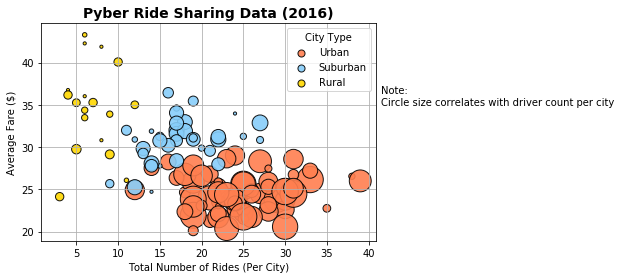

In [107]:
#create data frames for each city type then group by city
urban = merge_data[merge_data["type"] =="Urban"].groupby([merge_data["city"]])
suburban = merge_data[merge_data["type"] =="Suburban"].groupby([merge_data["city"]])
rural = merge_data[merge_data["type"] =="Rural"].groupby([merge_data["city"]])

#calculate the values for the x & y axis. also calculate a value to use for the size of the bubbles
urban_x = urban["ride_id"].count()
urban_y = urban["fare"].mean()
urban_size = urban["driver_count"].mean()

suburban_x = suburban["ride_id"].count()
suburban_y = suburban["fare"].mean()
suburban_size = suburban["driver_count"].mean()

rural_x = rural["ride_id"].count()
rural_y = rural["fare"].mean()
rural_size = rural["driver_count"].mean()

#create scatter plot
plt.scatter(urban_x,urban_y, s=urban_size * 10, marker="o", facecolor="coral", edgecolors="black", alpha = 0.90, label = "Urban")
plt.scatter(suburban_x,suburban_y,s=suburban_size * 10, marker="o", facecolor="lightskyblue", edgecolors="black", alpha = 0.90, label = "Suburban")
plt.scatter(rural_x,rural_y,s=rural_size * 10, marker="o", facecolor="gold", edgecolors="black", alpha = 0.90, label = "Rural")
plt.grid()

#create title and lables
plt.title("Pyber Ride Sharing Data (2016)", fontsize=14, weight="bold")
plt.xlabel("Total Number of Rides (Per City)", fontsize=10)
plt.ylabel("Average Fare ($)", fontsize=10)

#create legend
legend = plt.legend(title="City Type", fontsize = 10, loc="upper right")

#change markers size for legend one by one using _sizes property found here: https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

#text outside of plot found here: https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
plt.text(41.5,35, "Note: \nCircle size correlates with driver count per city", fontsize=10)

#save the figure. using bbox in order to fix the note's text so it shows
plt.savefig("data/PyberRideSharingData2016.png",bbox_inches="tight")

#shows the scatter plot
plt.show()


## Total Fares by City Type

In [108]:
#create a data frame grouped by "type", then calculate the sum of fares by "type"
type_group = merge_data.groupby(["type"])
total_fares_sum = type_group["fare"].sum()

#show the sum values by type for reference
total_fares_sum.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

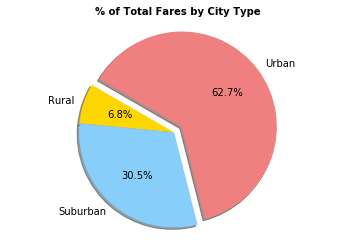

In [109]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]

#set up the pie graph
plt.pie(total_fares_sum, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type", fontsize=10, weight="bold")

#save the plot. using bbox in order to fix the note's text
plt.savefig("data/TotalFaresbyCityType.png",bbox_inches="tight")
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [110]:
#create a data frame grouped by "type", then calculate the count of ride_ids by "type"
type_group = merge_data.groupby(["type"])
total_rides_count = type_group["ride_id"].count()

#show the count values by type for reference
total_rides_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

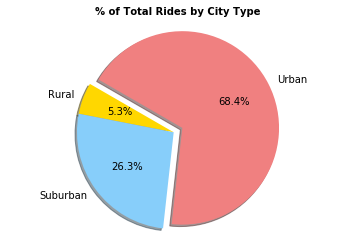

In [111]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]

#set up the pie graph
plt.pie(total_rides_count, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type", fontsize=10, weight="bold")
plt.axis("equal")

#save the figure 
plt.savefig("data/TotalRidesbyCityType.png",bbox_inches="tight")

#show the pie graph
plt.show()


## Total Drivers by City Type

In [112]:
#create a data frame grouped by "type" using the city_df, then calculate the sum of driver_count by "type"
city_type = city_df.groupby(["type"])
total_drivers_sum = city_type["driver_count"].sum()

#show the sum values by type for reference
total_drivers_sum.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

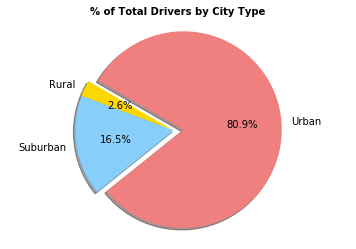

In [113]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]

#set up the pie graph
plt.pie(total_drivers_sum, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type", fontsize=10, weight="bold")
plt.axis("equal")

#save the figure
plt.savefig("data/TotalDriversbyCityType.png",bbox_inches="tight")

#show the pie graph
plt.show()